In [ ]:
# default_exp core

# Few-shot Learning with GPT-J

> API details.

In [1]:
# export
import os
import pandas as pd

In [2]:
#hide
from nbdev.showdoc import *
import toml
s = toml.load("../.streamlit/secrets.toml", _dict=dict)

Using `GPT_J` model API from [Nlpcloud](https://nlpcloud.io/home/token)

In [3]:
import nlpcloud
client = nlpcloud.Client("gpt-j", s['nlpcloud_token'], gpu=True)

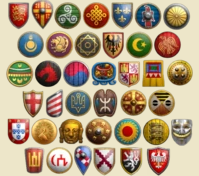

## Aoe2 Civ Builder
https://ageofempires.fandom.com/wiki/Civilizations_(Age_of_Empires_II)

In [74]:
# example API call
generation = client.generation("""Civilisation: Britons
Specialty: Foot archers
Unique unit: Longbowman
Unique technologies: Yeomen (+1 range for foot archers and +2 attack for towers)
Unique technologies: Warwolf (Trebuchets do blast damage)
Wonder: Chichester Cathedral
Civilization bonuses: Shepherds work 25% faster.
Team bonus: Town Centers cost -50% wood (starting in the Castle Age).
###
Civilisation: Mongols
Specialty: Cavalry archers
Unique unit:  Mangudai
Unique technologies: Nomads (Houses retain population when destroyed)
Unique technologies: Drill (Siege Workshop units move 50% faster)
Wonder: Great Tent of Genghis Khan
Civilization bonuses: Hunters work 40% faster.
Team bonus: The Scout Cavalry line has +2 Line of Sight.
###     
Civilisation: Celts
Specialty: Infantry and siege weapons
Unique unit: Woad Raider
Unique technologies: Stronghold (Castles and towers fire 25% faster)
Unique technologies: Furor Celtica (Siege Workshop units have +40% HP)
Wonder: Rock of Cashel
Civilization bonuses: Infantry units move 15% faster (starting in the Feudal Age).
Civilization bonuses: Lumberjacks work 15% faster.
Civilization bonuses: Siege weapons fire 25% faster.
Civilization bonuses: Enemy herdables can be converted regardless of enemy units next to them.
Team bonus: Siege Workshops work 20% faster.
###
Civilisation: New Zealand Maori""",
    max_length=250,
    length_no_input=True,
    end_sequence="###",
    remove_input=True)

print('Civilisation: New Zealand Maori\n ', generation["generated_text"])

Civilisation: New Zealand Maori
  
Specialty: Armoured archers with pikes
Unique unit: Warrior
Unique technologies: Weapons (Archers do 80% damage to pikemen)
Wonder: Rangia
Civilization bonuses: Archers do 80% damage to pikemen
Team bonuses: Enemies of archers cannot use siege techniques.
###


In [88]:

def create_input_string(civname):
    return f"""Civilisation: Britons
Specialty: Foot archers
Unique unit: Longbowman
Unique technologies: Yeomen (+1 range for foot archers and +2 attack for towers)
Unique technologies: Warwolf (Trebuchets do blast damage)
Wonder: Chichester Cathedral
Civilization bonuses: Shepherds work 25% faster.
Team bonus: Town Centers cost -50% wood (starting in the Castle Age).
###
Civilisation: Mongols
Specialty: Cavalry archers
Unique unit:  Mangudai
Unique technologies: Nomads (Houses retain population when destroyed)
Unique technologies: Drill (Siege Workshop units move 50% faster)
Wonder: Great Tent of Genghis Khan
Civilization bonuses: Hunters work 40% faster.
Team bonus: The Scout Cavalry line has +2 Line of Sight.
###     
Civilisation: Celts
Specialty: Infantry and siege weapons
Unique unit: Woad Raider
Unique technologies: Stronghold (Castles and towers fire 25% faster)
Unique technologies: Furor Celtica (Siege Workshop units have +40% HP)
Wonder: Rock of Cashel
Civilization bonuses: Infantry units move 15% faster (starting in the Feudal Age).
Civilization bonuses: Lumberjacks work 15% faster.
Civilization bonuses: Siege weapons fire 25% faster.
Civilization bonuses: Enemy herdables can be converted regardless of enemy units next to them.
Team bonus: Siege Workshops work 20% faster.
###
Civilisation: {civname}"""


def generate_civ(civname, client):
    """
    Creates input string and sends to nlpcloud for few-shot learning
    """
    print(f'🌐 Generating New Civ: {civname} \n')

    input_str = create_input_string(civname)

    generation = client.generation(input_str,
                max_length=250,
                length_no_input=True,
                end_sequence='###',
                remove_input=True)
    civgen = generation["generated_text"].strip('\n')
    
    print(f"🛡️ **{civname}**\n{civgen}")
    
    return civgen


In [87]:
c = generate_civ(civname='New Zealand Maori', client=client)

Generating New Civ: New Zealand Maori 

🛡️ New Zealand Maori/nSpecialty: Maori archers
Unique unit: Nga Moeroa
Unique technologies: Ngati Waarawake
Unique technologies: Taniwha
Wonder: Hei-O-Te-Po
Civilization bonuses: Maori units are 15% better off water.
Civilisation bonuses: Maori workers do 20% better than their European counterparts.
Civilization bonuses: Maori archers do 50% better damage with arrows.
Team bonus: Maori units are at their best on dry land.
###


In [93]:
c = generate_civ(civname='Fijians', client=client)

🌐 Generating New Civ: Fijians 

🛡️ **Fijians**
Specialty: Specialized attack, long range combat, and shipbuilding
Unique unit: War canoe
Unique technologies: War canoes (+2 attack, +20% range), Shipwrights (+70% build ship time)
Wonder: Tanna or Makatea Islands
Civilization bonuses:  Taino can fight from land and sea.  Taino can build shipwrights at +70% of normal rate.
Team bonus:  Taino build shipwrights at +75% of normal rate. - +10% of time at sea to build ships.
###


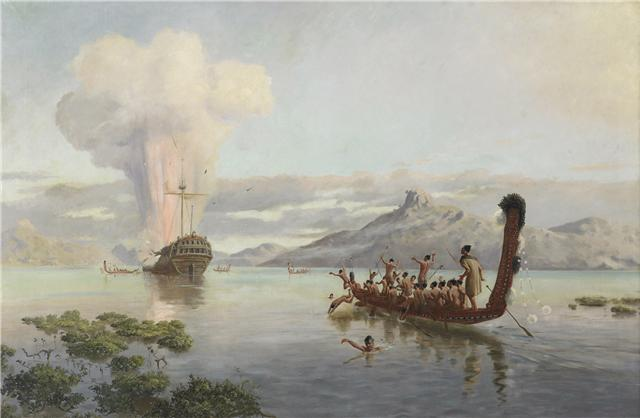

In [102]:
c = generate_civ(civname='Canadians', client=client)

🌐 Generating New Civ: Canadians 

🛡️ **Canadians**
Specialty: Infantry archers
Unique unit: Longbowman
Unique technologies: Native American
Wonder: Champlain's Memorial
Civilization bonuses: Wood cutters work 30% faster.
Team bonus: Native Americans can live in empty houses.
Civilization bonuses: Infantry units move +2 Lines of Sight.
Civilization bonuses: All buildings built in the Plains are built as Stone.
Civilization bonuses: Hauler unit costs -15% wood.
Civilization bonus: Woodcutters build Walls for free
Civilization bonuses: Cavalry and Lumberjacks work 50% faster.
Team bonus: Cavalry cost -15% wood.
Civilization bonuses: Cavalry cost 25% less Gold (starting in the Feudal Age).
Civilization bonuses: Herdables have -20% Movement.
Civilization bonuses: Lumberjacks build Walls for free (starting in the Feudal Age)
Civilization bonuses: Can convert enemy herdables to Wood.
Civilization bonuses: Castles cost -30% Gold.
###


In [101]:
c = generate_civ(civname='European Union', client=client)

🌐 Generating New Civ: European Union 

🛡️ **European Union**
Specialty: Infantry, artillery and cavalry
Unique unit: Arbalet
Unique technologies: Feudalism (+1 population for peasants to work fields)
Wonder: Chartres Cathedral
Civilization bonuses: Woodcutters work 15% faster.
Civilization bonuses: Siege Workshops do +20% damage.
Civilization bonuses: Infantry units move 20% faster.
Civilization bonuses: Artillery units do +20% Damage.
Team Bonus: All cavalry units have +20% movement.
###


In [103]:
c = generate_civ(civname='Dutch', client=client)

🌐 Generating New Civ: Dutch 

🛡️ **Dutch**
Specialty: Infantry and siege
Unique unit: Fluiters (Musketmen +4 range)
Unique technologies: Watermolen (The Water Mill produces food when it is destroyed)
Unique technologies: Fletemen (Musketmen +4 attack range)
Ultimate technology: Hoist (Lowered by -5 techcost when next to a catapult)
Master technology: Fluiters (Musketmen +4 range)
Wonder: Watermolen
Civilization bonuses: Wood-Cutters and Carpenters work 45% faster.
Team bonus: Siege works cost -50% logs.
###


In [106]:
c = generate_civ(civname='Star Wars Death Star', client=client)

🌐 Generating New Civ: Star Wars Death Star 

🛡️ **Star Wars Death Star**
Specialty:  Rocket launchers and star destroyers
Unique unit: Heavy weapons teams
Unique technologies: Trench defenses (Rocket turrets have +40% HP)
Unique technologies: Heavy weapons teams (Rocket turrets and star destroyers fire 75% faster)
Wonder: X-Wing starfighters
Civilization bonuses: Heavy weapons teams have +10% Accuracy.
#Civilization: Wurrrgh
Specialty:  The space dog.
Unique unit: Wurrrrh
Hoardable: Wurrrh (The space dog always has a horde of space hamsters with it.)
Units: Space hamsters
Team bonus: Space hamsters are 10% more accurate for all attacks.
Specialist: Space hamsters
###
